In [32]:
#Config
ProjectID="datawx"
queryFile="c:\\temp\\query.txt"
targetDataset="DATASCIENCE_SOURCEDATA"
serviceAcct="C:\\code\\datawx\\abbykatdev.json"
FileType="CoronaTest"

In [39]:
#DataScience DataSource
import pandas as pd
import numpy as np
import uuid

class SimpleTimer():
    def __init__(self, name):
        self.name = name
        self.start = pd.Timestamp.now()
        print("Starting " + self.name + " at " + str(self.start))

    def Stop(self):
        self.end = pd.Timestamp.now()
        print("Stopping " + self.name + " at " + str(self.end))
        print("Elapsed time for " + self.name + " is " + str(self.end - self.start))
    
    def GetElalpsed(self):
        return self.end - self.start

class DataSource():

    def __init__(self,filetype,sourceEnvironment,ExtractQuery):
        self.guid = str(uuid.uuid4())
        self.filetype = filetype
        self.sourceEnvironment = sourceEnvironment
        self.ExtractQuery = ExtractQuery
        self.loadedDate = pd.Timestamp.now()
        self.TargetTable =filetype + "_" + self.loadedDate.strftime("%Y_%m_%d") + "_" + self.guid
        self.WriteToBQ()

    def WriteToBQ(self):
        frame=[{"Filetype":self.filetype,
            "LoadedDate":self.loadedDate,
            "SourceEnvironment":self.sourceEnvironment,
            "ExtractQuery":self.ExtractQuery,
            "TargetTable":self.TargetTable,
            "GUID":self.guid}]
        print(frame)
        df = pd.DataFrame(frame)
        df.to_gbq("DATASCIENCE_SOURCEDATA._datasources", project_id=ProjectID, if_exists='append')

    @staticmethod    
    def GetLatest(fileType):
        query="""SELECT * FROM `datawx.DATASCIENCE_SOURCEDATA._datasources`
            where Filetype="{0}"
            order by LoadedDate desc
            limit 1""".format(fileType)

        #Get first row
        df = pd.read_gbq(query, project_id=ProjectID)
        row = df.iloc[0]
        source=DSDataSource(row["Filetype"],row["SourceEnvironment"],row["ExtractQuery"])
        source.loadedDate=row["LoadedDate"]
        source.TargetTable=row["TargetTable"]
        return source

class TrainingMetrics():

    @staticmethod
    def SaveMetrics(self,ExperimentName,ModelName,ModelVersion,ModelType,trainingTime:SimpleTimer):


In [1]:
#Semi-Automated Data Conveyor
import pandas as pd
import numpy as np

#import bigquery
from google.cloud import bigquery
from google.oauth2 import service_account

#Load SQL from file
with open(queryFile, 'r') as myfile:
    query=myfile.read()

#Create Data Source Entry
source=DSDataSource(FileType,"DEV",query)

#Set up query to transfer data from source to target
credentials = service_account.Credentials.from_service_account_file(serviceAcct)
job_config = bigquery.QueryJobConfig()
job_config.destination = ProjectID + "." + targetDataset + "." + source.TargetTable
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
job_config.use_legacy_sql = False

#Run Query
client = bigquery.Client(credentials= credentials,project=ProjectID)
query_job = client.query(query, job_config=job_config)

#Get latest feed for testing
src=DSDataSource.GetLatest(FileType)
print(src.TargetTable)






KeyboardInterrupt



In [34]:
import torch
from torch.autograd import Variable

# x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
# y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

x_data=[]
y_data=[]
for i in range(100):
    x_data.append([i])
    y_data.append([i*4])

#Split into test and training sets
x_train=x_data[0:80]
y_train=y_data[0:80]
x_test=x_data[80:100]
y_test=y_data[80:100]

#Convert to tensors
x_train = Variable(torch.Tensor(x_train))
y_traindata = Variable(torch.Tensor(y_train))
x_testdata=Variable(torch.Tensor(x_test))
y_testdata=Variable(torch.Tensor(y_test))

class LinearRegressionModel(torch.nn.Module):

	def __init__(self):
		super(LinearRegressionModel, self).__init__()
		self.linear = torch.nn.Linear(1, 1) # One in and one out

	def forward(self, x):
		y_pred = self.linear(x)
		return y_pred

# our model
our_model = LinearRegressionModel()

criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)

training_loss=[]
validation_loss=[]

for epoch in range(500):

    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(x_train)

    # Compute and print loss
    loss = criterion(pred_y, y_traindata)
    training_loss.append(loss.item())

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 99:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

    #Perform validation pass
    pred_y = our_model(x_testdata)
    loss = criterion(pred_y, y_testdata)
    validation_loss.append(loss.item())



epoch 99, loss nan
epoch 199, loss nan
epoch 299, loss nan
epoch 399, loss nan
epoch 499, loss nan


In [35]:
new_var = Variable(torch.Tensor([[4.0]]))
pred_y = our_model(new_var)
print("predict (after training)", 4, our_model(new_var).item())


predict (after training) 4 nan


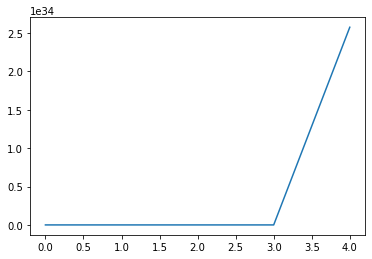

In [39]:
#Plot training loss and validation lostt
import matplotlib.pyplot as plt
#set x axis
x = np.arange(0, 500, 1)
plt.plot(x,training_loss)

#set labels
plt.xlabel('Epoch')
plt.ylabel('Loss')


#plt.plot(training_loss)
#plt.plot(validation_loss)
plt.show()

